In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objs as go
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
train_data=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Big-Mart-Sales-Prediction\\Dataset\\Train.csv")

In [3]:
test_data=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Big-Mart-Sales-Prediction\\Dataset\\Test.csv")

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

In [7]:
data=pd.concat([train_data,test_data])

In [8]:
data.shape

(14204, 12)

In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [14]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


# Preprocessing the dataset

In [17]:
categorical_features=[]
numerical_features=[]

In [18]:
# numerical_features=data.select_dtypes(include=['int64','float64'])
# list(numerical_features.columns)

In [19]:
for col in data.columns.tolist():
    if data[col].dtype=="object":
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [20]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [21]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [22]:
categorical_features.remove('Item_Identifier')
categorical_features.remove('Outlet_Identifier')
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [23]:

for col in categorical_features:
    print("-" * 40)
    print("Column Name Is",col)
    print("-" * 40)
    print(data[col].value_counts())  

----------------------------------------
Column Name Is Item_Fat_Content
----------------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
----------------------------------------
Column Name Is Item_Type
----------------------------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
----------------------------------------
Column Name Is Outlet_Size
----------------------------------------
Medium    4655
Small     3980
High      155

In [24]:
Fat_Content = {
    "Low Fat": ['LF', 'low fat','Low Fat'], 
    "Regular": ['Regular', 'reg']
}
for keys, values in Fat_Content.items():
    for name in values:
        data['Item_Fat_Content'].replace(name, keys, inplace=True)

In [25]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [28]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [29]:
data['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [30]:
data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

In [31]:
data['Item_Identifier'].unique()

array(['Food', 'Drinks', 'Non_Consumable'], dtype=object)

In [32]:
data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [33]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [34]:
# convert Outlet_Establishment_Year into number of year it has been established.
data['Outlet_Establishment_Year'] = 2020 - data['Outlet_Establishment_Year']
data = data.rename({'Outlet_Establishment_Year': 'No_Of_Years'}, axis=1)

In [35]:
data['No_Of_Years'].unique()

array([21, 11, 22, 33, 35, 18, 13, 23, 16], dtype=int64)

In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,No_Of_Years,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,21,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,11,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,21,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,22,NaN,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,33,High,Tier 3,Supermarket Type1,994.7052


# Filling missing values

In [37]:
data.isnull().sum()
# train_data.apply(lambda x: sum(x.isnull()))

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
No_Of_Years                0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
dtype: int64

In [38]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [39]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [40]:
# # Calculating number of Item_fat_contents that are also non_consumable

# bool3=data['Item_Identifier']=='Non_consumable'
# data['Item_Fat_Content'][bool3]='Non_edible'
# data['Item_Fat_Content'].value_counts()

In [41]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [42]:
data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
No_Of_Years             0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

# Data Visalization

# Checking for correation between different numerical columns

In [43]:
correlation = data.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,No_Of_Years,Item_Outlet_Sales
Item_Weight,1.000000,-0.013641,0.033002,-0.000462,0.008569
Item_Visibility,-0.013641,1.000000,-0.006351,0.083678,-0.099903
Item_MRP,0.033002,-0.006351,1.000000,-0.000141,0.440979
No_Of_Years,-0.000462,0.083678,-0.000141,1.000000,0.038061
Item_Outlet_Sales,0.008569,-0.099903,0.440979,0.038061,1.000000


<AxesSubplot:>

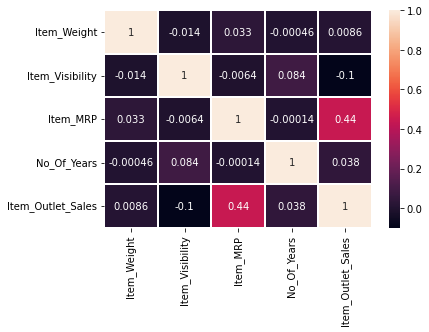

In [44]:
sns.heatmap(data=correlation,annot=True,linewidths=0.2)

In [45]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'No_Of_Years',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

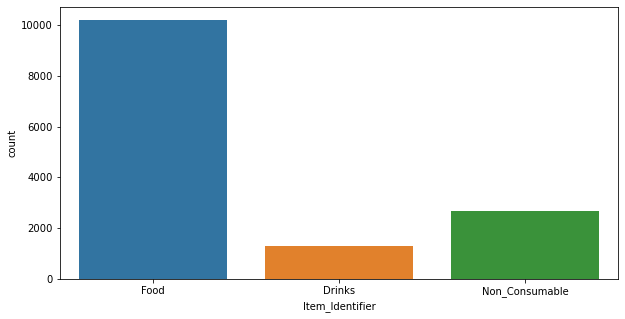

In [46]:
plt.subplots(figsize = (10,5))
sns.countplot(x='Item_Identifier', data=data)
plt.show()

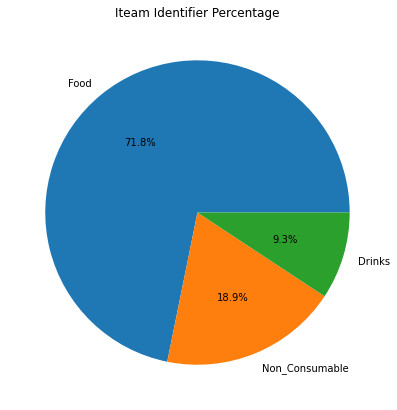

In [47]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Item_Identifier'].value_counts()[0:5]),labels=list(data['Item_Identifier'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Iteam Identifier Percentage')
plt.show()

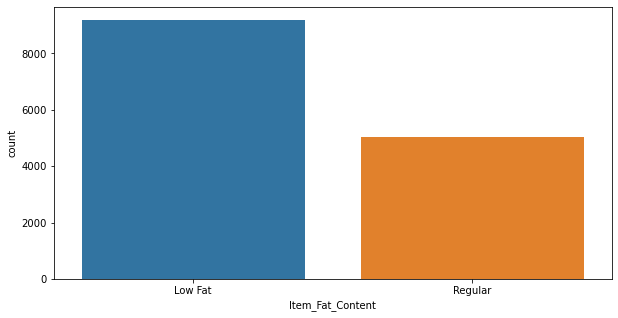

In [48]:
plt.subplots(figsize = (10,5))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

In [49]:
data["Item_Type"].nunique()

16

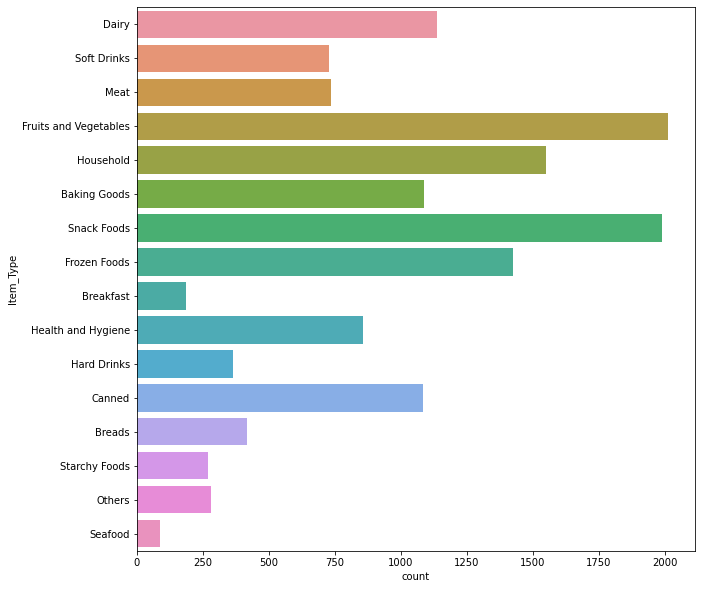

In [50]:
plt.subplots(figsize = (10,10))
sns.countplot(y='Item_Type', data=data)
plt.show()


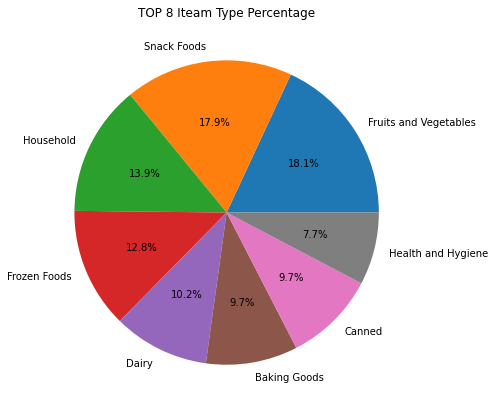

In [51]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Item_Type'].value_counts()[0:8]),labels=list(data['Item_Type'].value_counts()[0:8].keys()),autopct='%0.1f%%')
plt.title('TOP 8 Iteam Type Percentage')
plt.show()

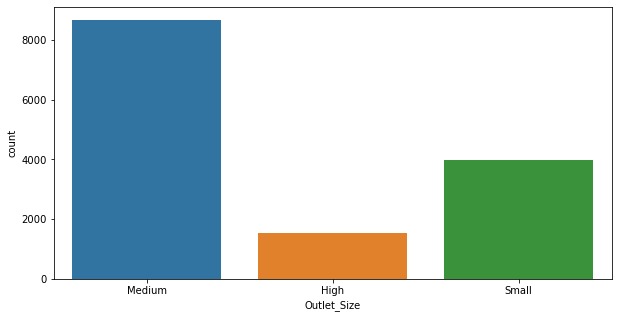

In [52]:
plt.subplots(figsize = (10,5))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

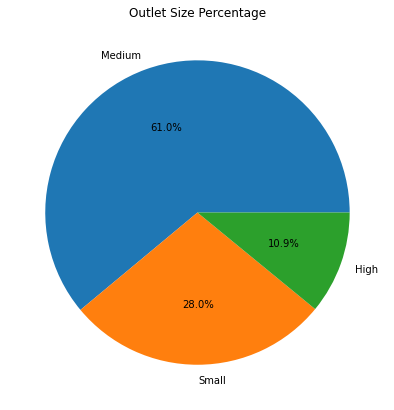

In [53]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Outlet_Size'].value_counts()[0:8]),labels=list(data['Outlet_Size'].value_counts()[0:8].keys()),autopct='%0.1f%%')
plt.title('Outlet Size Percentage')
plt.show()

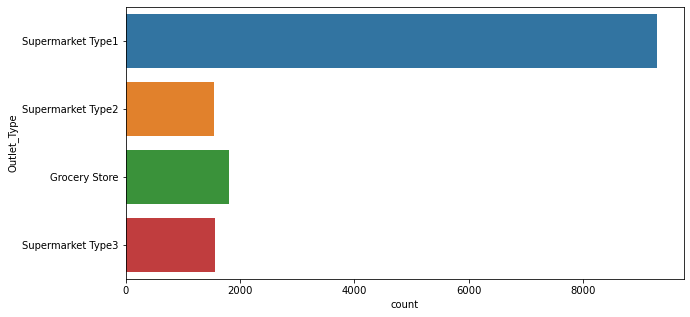

In [54]:
plt.subplots(figsize = (10,5))
sns.countplot(y='Outlet_Type', data=data)
plt.show()

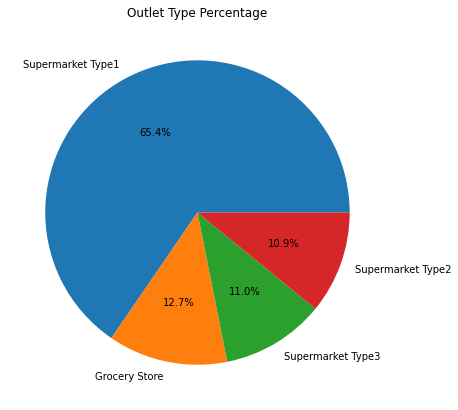

In [55]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Outlet_Type'].value_counts()[0:8]),labels=list(data['Outlet_Type'].value_counts()[0:8].keys()),autopct='%0.1f%%')
plt.title('Outlet Type Percentage')
plt.show()

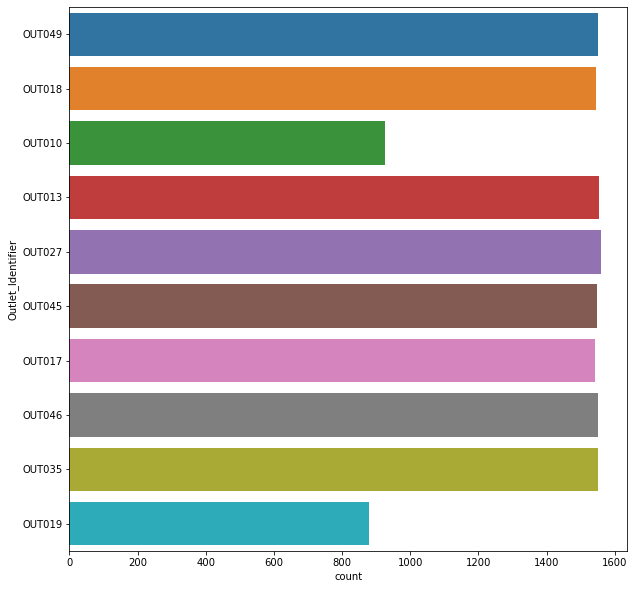

In [56]:
plt.subplots(figsize = (10,10))
sns.countplot(y='Outlet_Identifier', data=data)
plt.show()

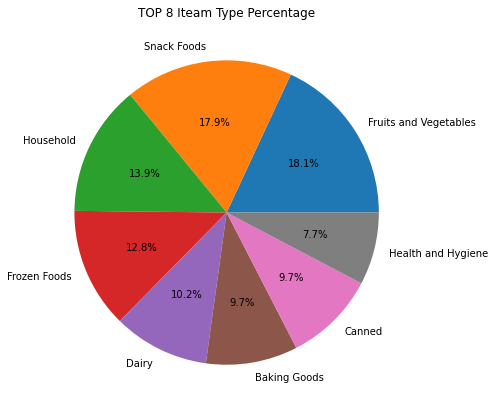

In [57]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Item_Type'].value_counts()[0:8]),labels=list(data['Item_Type'].value_counts()[0:8].keys()),autopct='%0.1f%%')
plt.title('TOP 8 Iteam Type Percentage')
plt.show()

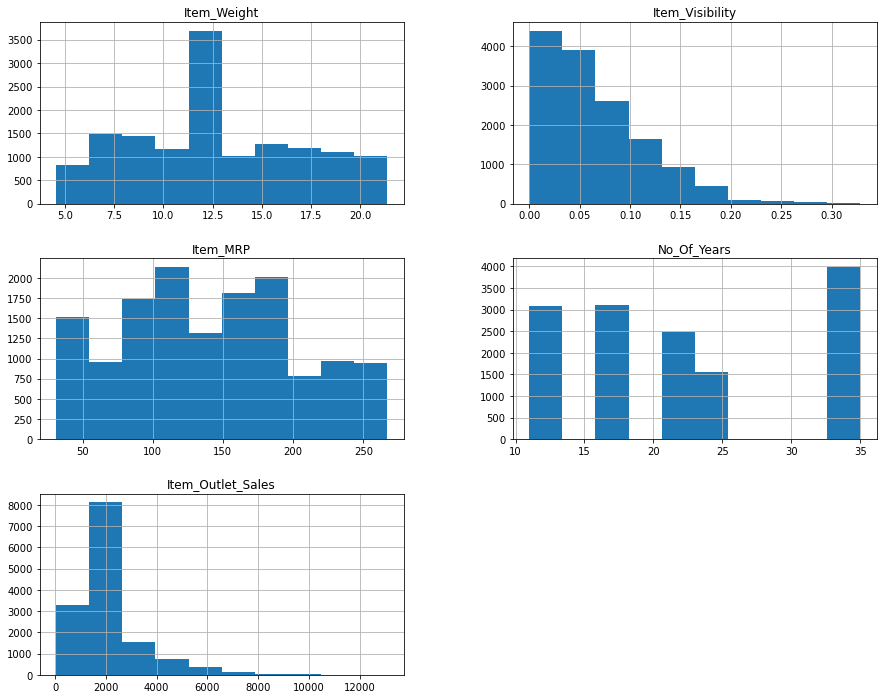

In [60]:
data.hist(figsize=(15,12))
plt.show()